Task 1: Load the dataset using pandas

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'environmental_data_lab8.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())


         date station  air_quality_index  temperature  precipitation
0  01-01-2023   ST001                152    19.432104       2.375433
1  02-01-2023   ST001                142    10.501780       9.713951
2  03-01-2023   ST001                 64    18.051979       1.809770
3  04-01-2023   ST001                156    15.286200       8.543851
4  05-01-2023   ST001                121    18.187434       4.922779


Task 2: Convert the date column to datetime type

In [15]:
# Convert the date column to datetime type
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

# Verify the conversion
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               730 non-null    datetime64[ns]
 1   station            730 non-null    object        
 2   air_quality_index  730 non-null    int64         
 3   temperature        730 non-null    float64       
 4   precipitation      730 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 28.6+ KB
None


Task 3: Group the data by station and calculate the monthly average temperature and total precipitation for each station

In [16]:
# Add a new column for the month
data['month'] = data['date'].dt.to_period('M')

# Group by station and month, then calculate the monthly average temperature and total precipitation
monthly_stats = data.groupby(['station', 'month']).agg({
    'temperature': 'mean',
    'precipitation': 'sum'
}).reset_index()

# Display the resulting dataframe
print(monthly_stats.head())

  station    month  temperature  precipitation
0   ST001  2023-01    20.102125     150.273910
1   ST001  2023-02    22.246220     129.313438
2   ST001  2023-03    22.468785     171.722548
3   ST001  2023-04    23.496925     165.990804
4   ST001  2023-05    22.669294     150.126836


Task 4: Create a bar plot that shows the total precipitation for both stations across the year

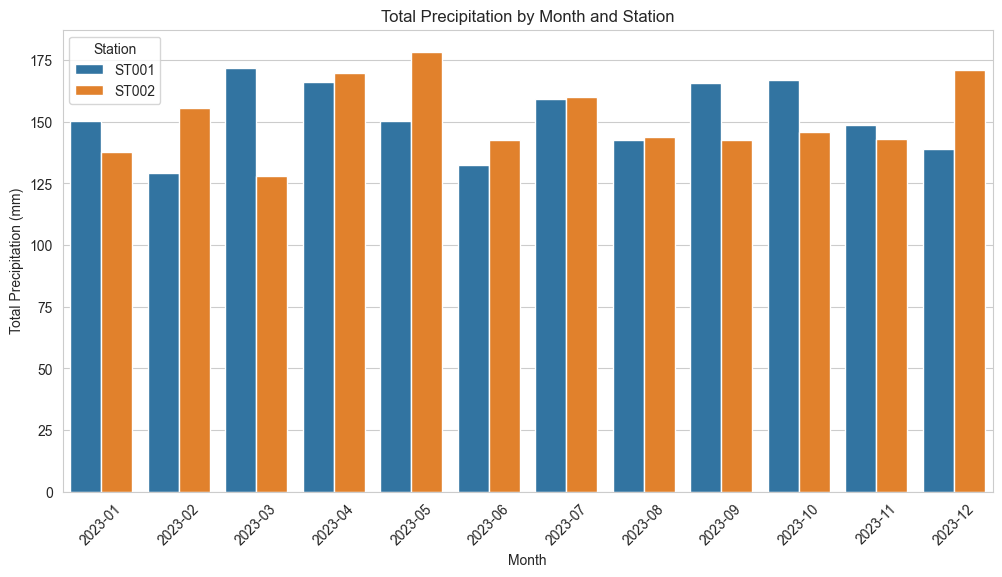

In [17]:
# Set the plot size and style
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Create a bar plot for total precipitation by month and station
sns.barplot(data=monthly_stats, x='month', y='precipitation', hue='station')

# Customize the plot
plt.title('Total Precipitation by Month and Station')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.xticks(rotation=45)
plt.legend(title='Station')

# Display the plot
plt.show()

Task 5: Plot a pie chart showing the percentage of days with different AQI categories for one of the stations

C:\Users\chuna\AppData\Local\Temp\ipykernel_16884\2078794559.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['AQI_category'] = station_data['air_quality_index'].apply(categorize_aqi)


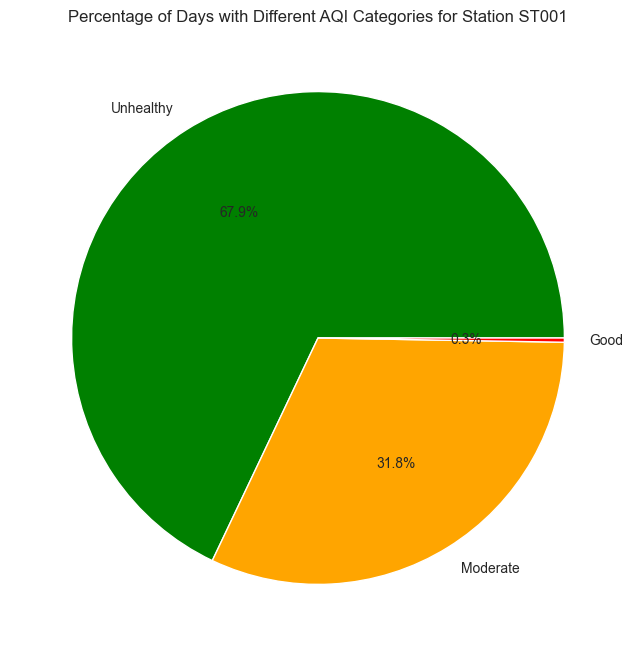

In [18]:
# Define AQI categories
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif 51 <= aqi <= 100:
        return 'Moderate'
    else:
        return 'Unhealthy'

# Filter data for one station (e.g., 'ST001')
station_data = data[data['station'] == 'ST001']

# Categorize the AQI values
station_data['AQI_category'] = station_data['air_quality_index'].apply(categorize_aqi)

# Calculate the percentage of days in each category
aqi_counts = station_data['AQI_category'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(aqi_counts, labels=aqi_counts.index, autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title('Percentage of Days with Different AQI Categories for Station ST001')
plt.show()

Task 6: Create a scatter plot comparing the daily temperature and AQI values for one station

C:\Users\chuna\AppData\Local\Temp\ipykernel_16884\12771930.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['AQI_color'] = station_data['air_quality_index'].apply(aqi_color)


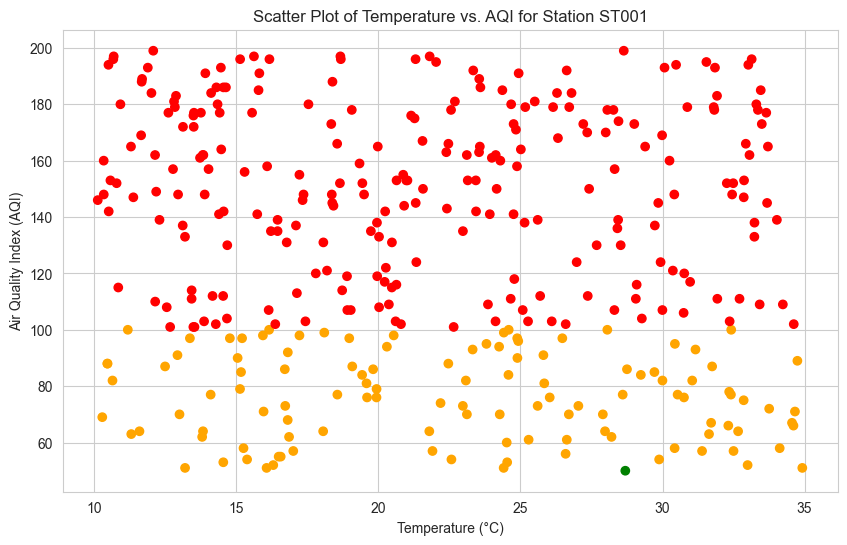

In [21]:
# Define AQI levels and corresponding colors
def aqi_color(aqi):
    if aqi <= 50:
        return 'green'
    elif 51 <= aqi <= 100:
        return 'orange'
    else:
        return 'red'

# Add a color column based on AQI levels
station_data['AQI_color'] = station_data['air_quality_index'].apply(aqi_color)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(station_data['temperature'], station_data['air_quality_index'], c=station_data['AQI_color'])
plt.title('Scatter Plot of Temperature vs. AQI for Station ST001')
plt.xlabel('Temperature (°C)')
plt.ylabel('Air Quality Index (AQI)')
plt.grid(True)
plt.show()

Task 7: Generate a heatmap showing the monthly average AQI levels for both stations

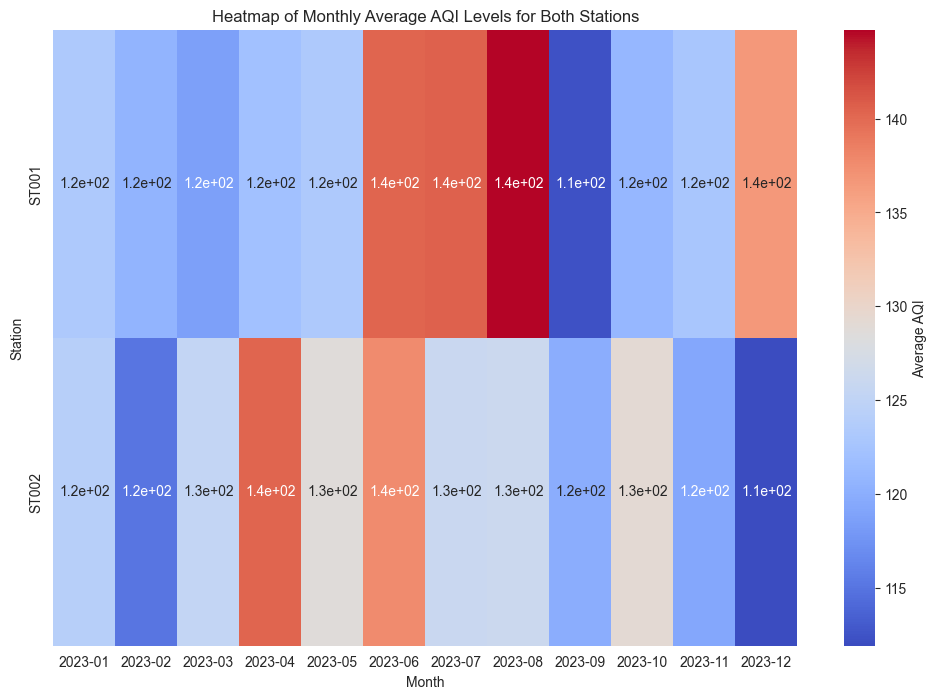

In [20]:
# Group the data by station and month, and calculate the monthly average AQI
monthly_aqi = data.groupby(['station', 'month'])['air_quality_index'].mean().unstack()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_aqi, annot=True, cmap='coolwarm', cbar_kws={'label': 'Average AQI'})
plt.title('Heatmap of Monthly Average AQI Levels for Both Stations')
plt.xlabel('Month')
plt.ylabel('Station')
plt.show()